# What is Feature Scaling?

#### Feature scaling is a technique to standardize the independent features present in the data in a fixed range

# Why do we need Feature Scaling?

# Types of feature Scaling

## 1. Standardization        (z-score Normalization)        
## 2.Normalization

# 1. Standardization

### Mean = 0 , Standard deviation = 1

## Example 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\data\\Social_Network_Ads.csv')


In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(3)

,Age,EstimatedSalary,Purchased
237,37,80000,0
65,24,58000,0
118,40,59000,0


#### train_test_split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                 df['Purchased'],test_size=0.2,
                                                 random_state=0)
x_train.shape,x_test.shape

((320, 2), (80, 2))

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit the scaler to the train set , it will learn the parameters
sc.fit(x_train)

#transform train and test sets
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

In [11]:
sc.mean_

array([3.8218750e+01, 6.9928125e+04])

In [12]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns= x_test.columns)

In [13]:
x_train.describe().round()

,Age,EstimatedSalary
count,320.0,320.0
mean,38.0,69928.0
std,10.0,34570.0
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
x_train_scaled.describe().round()

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


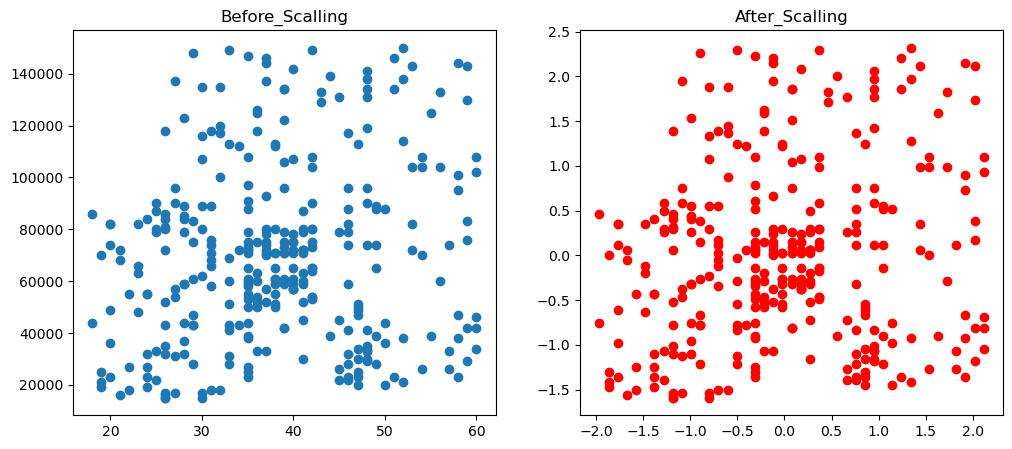

In [21]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("Before_Scalling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After_Scalling")

plt.show()

In [1]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
2. Normalization